# 安徽安庆市项目`WRF-CMAQ`模拟分析
## 挑选个别日期研究小时时段

---
*@author: Evan*\
*@date: 2023-05-14*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

import sys
sys.path.append('../src/')
# import ModelEvaLib as me

In [17]:
datapath = 'F:/Data/case_anqing/April/'
chemFile = xr.open_dataset(datapath+'April_chem.nc')
metFile  = xr.open_dataset(datapath+'April_met.nc')
paFile   = xr.open_dataset(datapath+'April_PA1.nc')
isamFile = xr.open_dataset(datapath+'April_ISAM1.nc')

lat = chemFile.latitude
lon = chemFile.longitude

O3_L1  = chemFile.O3[:,0,:,:]
O3_L2  = chemFile.O3[:,18,:,:]
NO2_L1 = chemFile.NO2[:,0,:,:]
NO2_L2 = chemFile.NO2[:,18,:,:]

uwind_L1 = metFile.uwind[:,0,:,:]
uwind_L2 = metFile.uwind[:,18,:,:]
vwind_L1 = metFile.vwind[:,0,:,:]
vwind_L2 = metFile.vwind[:,18,:,:]

BCON_L1 = isamFile.O3_BCO[:,0,:,:]
BCON_L2 = isamFile.O3_BCO[:,18,:,:]

In [3]:
shp_aq = Reader('F:/Data/case_anqing/shapefile/Anqing_district/anqing_district.shp')
shp_pro = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/2. Province/province.shp')
shp_cit = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/3. City/city.shp')

## 选择高BCON与低BCON比较

* 高: 04-02, 04-10, 04-12, 04-16, 04-17, 04-27, 04-28
* 低: 04-05, 04-06, 04-24, 04-25, 04-29

### 1.O3

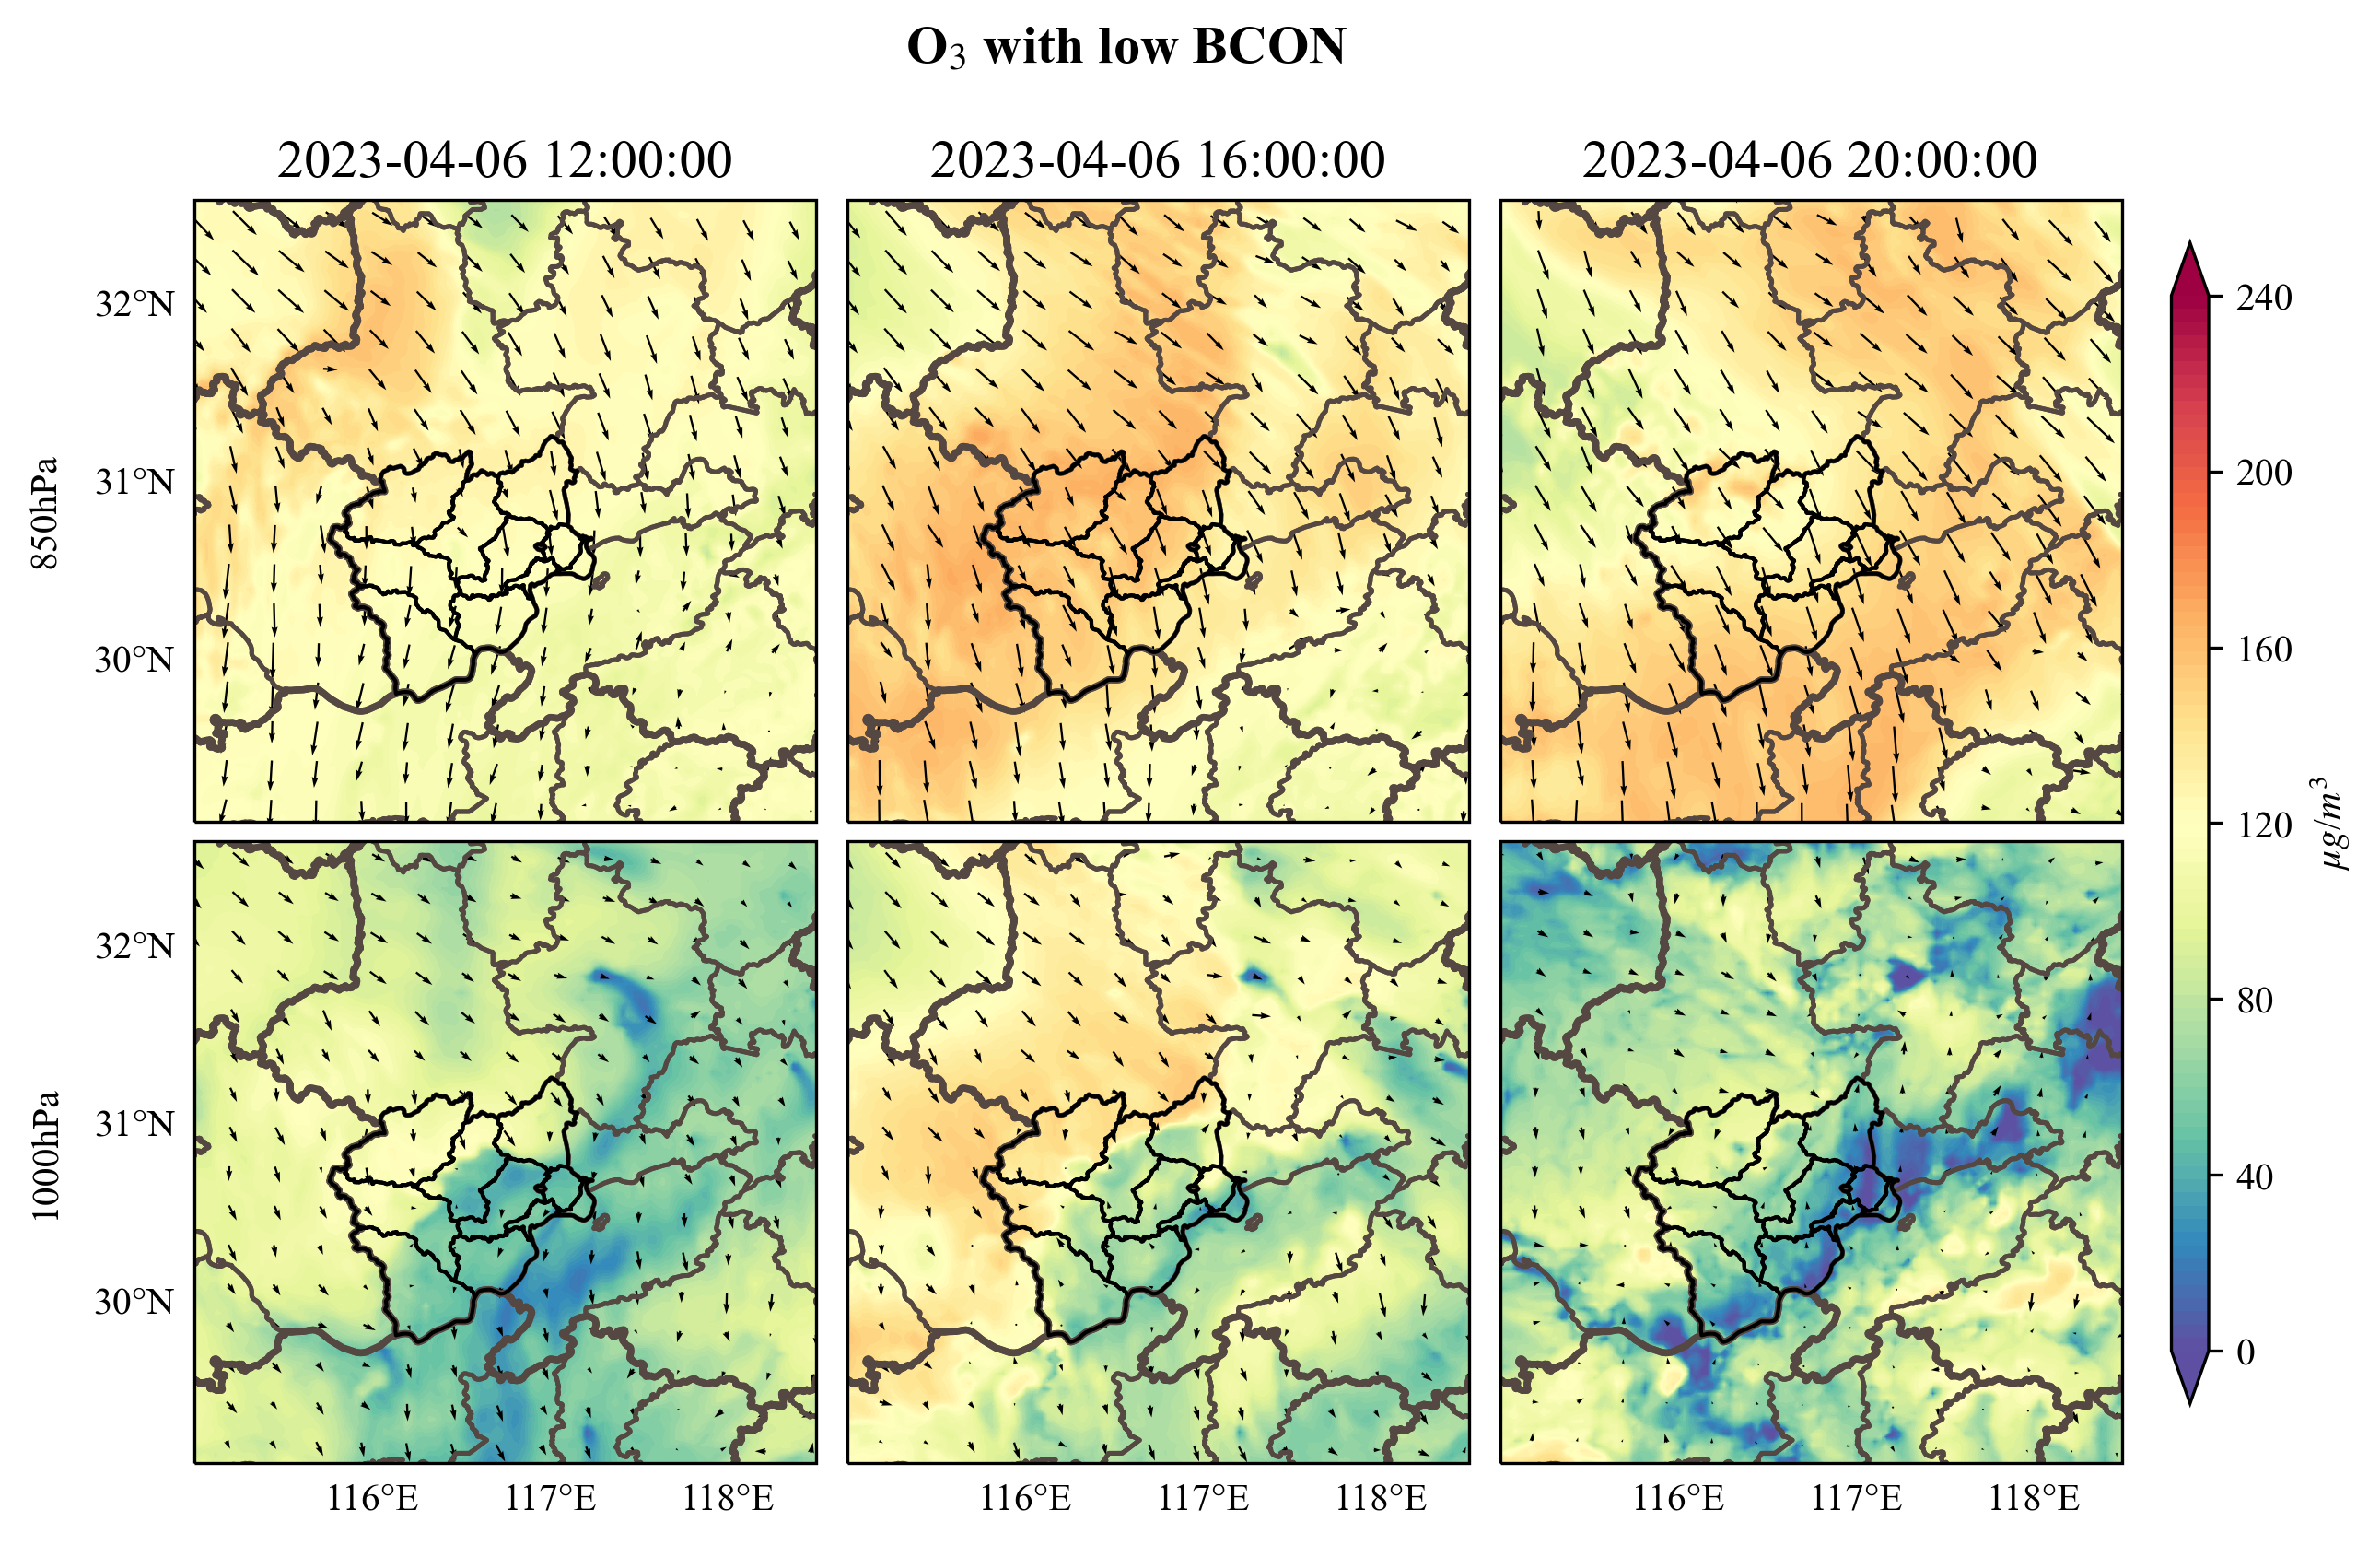

In [10]:
date=6
hour=np.array([12,16,20])
tstep = (date-1)*24+hour-1

cmax=241
cmaplevel=np.arange(0,cmax,3)
proj=ccrs.PlateCarree()
fig = plt.figure(figsize=(9,6),dpi=300)
ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

for j in range(3):
    # ----------------1000hPa----------------
    # SHP Lines
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
    ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
    ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

    # contour map
    cmap=ax[1][j].contourf(lon,lat,O3_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

    # wind quiver
    xgrid=np.size(uwind_L1,2)
    ygrid=np.size(vwind_L1,1)
    ngrid=8

    ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
            uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
            transform=proj,color='k',alpha=1,scale=200,headwidth=3)
    
    #  set titles
    ax[1][j].set_title('')

    # ----------------850hPa----------------
    # SHP Lines
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
    ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
    ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

    # contour map
    cmap=ax[0][j].contourf(lon,lat,O3_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

    # wind quiver
    ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
            uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
            transform=proj,color='k',alpha=1,scale=200,headwidth=3)

    # set titles
    ax[0][j].set_title(pd.to_datetime(
        '2023-04-'+str(date)+'T'+str(hour[j])
        ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

    # set tick
    gl=ax[1][j].gridlines(
        xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False
    gl.left_labels=False

    if (j==0):
        gl=ax[0][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.bottom_labels=False
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.bottom_labels=False

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+1,40))
cbar.set_label('$\mu$$g$/$m^3$')

# set axis label
plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

plt.suptitle('O$_3$ with low BCON',size=14,weight='bold')

plt.show()

In [13]:
dates = np.array([5,6,24,25,29])
for date in dates:
    hour  = np.array([12,16,20])
    tstep = (date-1)*24+hour-1

    cmax=241
    cmaplevel=np.arange(0,cmax,3)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(9,6),dpi=300)
    ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

    for j in range(3):
        # ----------------1000hPa----------------
        # SHP Lines
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[1][j].contourf(lon,lat,O3_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)
        
        #  set titles
        ax[1][j].set_title('')

        # ----------------850hPa----------------
        # SHP Lines
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[0][j].contourf(lon,lat,O3_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)

        # set titles
        ax[0][j].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[j])
            ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

        # set tick
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.left_labels=False

        if (j==0):
            gl=ax[0][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False
            gl=ax[1][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                    linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,40))
    cbar.set_label('$\mu$$g$/$m^3$')

    # set axis label
    plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
    plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

    plt.suptitle('O$_3$ with low BCON',size=14,weight='bold')
    plt.savefig('D:/Download/low_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-05
saving 04-06
saving 04-24
saving 04-25
saving 04-29


In [14]:
dates = np.array([2,10,12,16,17,27,28])
for date in dates:
    hour  = np.array([12,16,20])
    tstep = (date-1)*24+hour-1

    cmax=241
    cmaplevel=np.arange(0,cmax,3)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(9,6),dpi=300)
    ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

    for j in range(3):
        # ----------------1000hPa----------------
        # SHP Lines
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[1][j].contourf(lon,lat,O3_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)
        
        #  set titles
        ax[1][j].set_title('')

        # ----------------850hPa----------------
        # SHP Lines
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[0][j].contourf(lon,lat,O3_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)

        # set titles
        ax[0][j].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[j])
            ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

        # set tick
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.left_labels=False

        if (j==0):
            gl=ax[0][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False
            gl=ax[1][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                    linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,40))
    cbar.set_label('$\mu$$g$/$m^3$')

    # set axis label
    plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
    plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

    plt.suptitle('O$_3$ with high BCON',size=14,weight='bold')
    plt.savefig('D:/Download/high_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-02
saving 04-10
saving 04-12
saving 04-16
saving 04-17
saving 04-27
saving 04-28


### 2.1 BCON day

In [21]:
dates = np.array([5,6,24,25,29])
for date in dates:
    hour  = np.array([12,16,20])
    tstep = (date-1)*24+hour-1

    cmax=241
    cmaplevel=np.arange(0,cmax,3)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(9,6),dpi=300)
    ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

    for j in range(3):
        # ----------------1000hPa----------------
        # SHP Lines
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[1][j].contourf(lon,lat,BCON_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)
        
        #  set titles
        ax[1][j].set_title('')

        # ----------------850hPa----------------
        # SHP Lines
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[0][j].contourf(lon,lat,BCON_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)

        # set titles
        ax[0][j].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[j])
            ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

        # set tick
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.left_labels=False

        if (j==0):
            gl=ax[0][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False
            gl=ax[1][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                    linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,40))
    cbar.set_label('$\mu$$g$/$m^3$')

    # set axis label
    plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
    plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

    plt.suptitle('low BCON of O$_3$',size=14,weight='bold')
    plt.savefig('D:/Download/bcon_low_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-05
saving 04-06
saving 04-24
saving 04-25
saving 04-29


In [22]:
dates = np.array([2,10,12,16,17,27,28])
for date in dates:
    hour  = np.array([12,16,20])
    tstep = (date-1)*24+hour-1

    cmax=241
    cmaplevel=np.arange(0,cmax,3)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(9,6),dpi=300)
    ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

    for j in range(3):
        # ----------------1000hPa----------------
        # SHP Lines
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[1][j].contourf(lon,lat,BCON_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)
        
        #  set titles
        ax[1][j].set_title('')

        # ----------------850hPa----------------
        # SHP Lines
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[0][j].contourf(lon,lat,BCON_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)

        # set titles
        ax[0][j].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[j])
            ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

        # set tick
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.left_labels=False

        if (j==0):
            gl=ax[0][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False
            gl=ax[1][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                    linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,40))
    cbar.set_label('$\mu$$g$/$m^3$')

    # set axis label
    plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
    plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

    plt.suptitle('high BCON of O$_3$',size=14,weight='bold')
    plt.savefig('D:/Download/bcon_high_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-02
saving 04-10
saving 04-12
saving 04-16
saving 04-17
saving 04-27
saving 04-28


### 2.2 BCON night

In [25]:
dates = np.array([5,6,24,25,29])
hour  = np.array([4,8,22])
for date in dates:
    tstep = (date-1)*24+hour-1

    cmax=241
    cmaplevel=np.arange(0,cmax,3)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(9,6),dpi=300)
    ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

    for j in range(3):
        # ----------------1000hPa----------------
        # SHP Lines
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[1][j].contourf(lon,lat,BCON_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)
        
        #  set titles
        ax[1][j].set_title('')

        # ----------------850hPa----------------
        # SHP Lines
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[0][j].contourf(lon,lat,BCON_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)

        # set titles
        ax[0][j].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[j]).zfill(2)
            ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

        # set tick
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.left_labels=False

        if (j==0):
            gl=ax[0][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False
            gl=ax[1][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                    linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,40))
    cbar.set_label('$\mu$$g$/$m^3$')

    # set axis label
    plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
    plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

    plt.suptitle('low BCON of O$_3$',size=14,weight='bold')
    plt.savefig('D:/Download/bcon_night_low_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-05
saving 04-06
saving 04-24
saving 04-25
saving 04-29


In [ ]:
dates = np.array([2,10,12,16,17,27,28])
hour  = np.array([4,8,22])
for date in dates:
    tstep = (date-1)*24+hour-1

    cmax=241
    cmaplevel=np.arange(0,cmax,3)
    proj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(9,6),dpi=300)
    ax = fig.subplots(2,3,subplot_kw={'projection':proj},sharex=True,sharey=True)

    for j in range(3):
        # ----------------1000hPa----------------
        # SHP Lines
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[1][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[1][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[1][j].contourf(lon,lat,BCON_L1[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[1][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)
        
        #  set titles
        ax[1][j].set_title('')

        # ----------------850hPa----------------
        # SHP Lines
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.8)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='#554741',facecolor='None'), linewidth=1.2)
        ax[0][j].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1)
        ax[0][j].set_extent([115., 118.5, 29.1, 32.6],ccrs.PlateCarree())

        # contour map
        cmap=ax[0][j].contourf(lon,lat,BCON_L2[tstep[j],:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[0][j].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep[j],0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj,color='k',alpha=1,scale=200,headwidth=3)

        # set titles
        ax[0][j].set_title(pd.to_datetime(
            '2023-04-'+str(date)+'T'+str(hour[j]).zfill(2)
            ).strftime('%Y-%m-%d %H:%M:%S'),size=14)

        # set tick
        gl=ax[1][j].gridlines(
            xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
            draw_labels=True, x_inline=False, y_inline=False,
            linewidth=0, linestyle='--', color='gray')
        gl.top_labels = False
        gl.right_labels =False
        gl.rotate_labels=False
        gl.left_labels=False

        if (j==0):
            gl=ax[0][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False
            gl=ax[1][j].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                    linewidth=0, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False
            gl.bottom_labels=False

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.05,hspace=0.01)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,40))
    cbar.set_label('$\mu$$g$/$m^3$')

    # set axis label
    plt.text(-0.24,0.5,'850hPa',horizontalalignment='center',verticalalignment='center',transform=ax[0][0].transAxes,rotation=90)
    plt.text(-0.24,0.5,'1000hPa',horizontalalignment='center',verticalalignment='center',transform=ax[1][0].transAxes,rotation=90)

    plt.suptitle('high BCON of O$_3$',size=14,weight='bold')
    plt.savefig('D:/Download/bcon_night_high_'+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d')+'.png')
    print('saving '+pd.to_datetime('2023-04-'+str(date)).strftime('%m-%d'))
    plt.close()

saving 04-02
saving 04-10
saving 04-12
saving 04-16
saving 04-17
saving 04-27
saving 04-28
